<a href="https://colab.research.google.com/github/Entspannter/CrispCerebella/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Entspannter/CrispCerebella.git

Cloning into 'CrispCerebella'...
remote: Enumerating objects: 830, done.
remote: Counting objects: 100% (257/257), done.
remote: Compressing objects: 100% (233/233), done.
remote: Total 830 (delta 143), reused 61 (delta 23), pack-reused 573
Receiving objects: 100% (830/830), 322.93 MiB | 31.20 MiB/s, done.
Resolving deltas: 100% (444/444), done.
Checking out files: 100% (122/122), done.


In [2]:
pip install -q -U keras-tuner

     |████████████████████████████████| 96 kB 5.4 MB/s 


In [3]:
import os 
import numpy as np
from google.colab import files

In [4]:
# Import own functions and model-classes
from CrispCerebella.Code.train_functions import *
from CrispCerebella.Code.data_loading import *
from CrispCerebella.Code.architecture import *
from CrispCerebella.Code.test_functions import *

In [5]:
testX, testy = datasetloader('test', '/content/CrispCerebella/Dataset/UCI HAR Dataset/')
print("Shape of test Data:", testX.shape, testy.shape)


Shape of test Data: (2947, 128, 9) (2947, 1)


In [6]:
y_labels = load_labels('/content/CrispCerebella/Dataset/UCI HAR Dataset/test/y_test.txt')

In [7]:
acc_LSTM = "9138"
acc_CNNLSTM ="9192"
acc_ConvLSTM ="9053"
acc_Transfer = "8649"

In [8]:
# unzip the folder of the model with a given accuracy
!unzip /content/CrispCerebella/Models/Final_Model_LSTM_{acc_LSTM}.zip 
!unzip /content/CrispCerebella/Models/Final_Model_CNNLSTM_{acc_CNNLSTM}.zip 
!unzip /content/CrispCerebella/Models/Final_Model_ConvLSTM_{acc_ConvLSTM}.zip 
!unzip /content/CrispCerebella/Models/Final_Model_Transfermodel_{acc_Transfer}.zip 

Archive:  /content/CrispCerebella/Models/Final_Model_LSTM_9138.zip
   creating: content/CrispCerebella/Models/Final_Model_LSTM_9138/
   creating: content/CrispCerebella/Models/Final_Model_LSTM_9138/variables/
  inflating: content/CrispCerebella/Models/Final_Model_LSTM_9138/variables/variables.index  
  inflating: content/CrispCerebella/Models/Final_Model_LSTM_9138/variables/variables.data-00000-of-00001  
   creating: content/CrispCerebella/Models/Final_Model_LSTM_9138/assets/
  inflating: content/CrispCerebella/Models/Final_Model_LSTM_9138/keras_metadata.pb  
  inflating: content/CrispCerebella/Models/Final_Model_LSTM_9138/saved_model.pb  
Archive:  /content/CrispCerebella/Models/Final_Model_CNNLSTM_9192.zip
   creating: content/CrispCerebella/Models/Final_Model_CNNLSTM_9192/
   creating: content/CrispCerebella/Models/Final_Model_CNNLSTM_9192/variables/
  inflating: content/CrispCerebella/Models/Final_Model_CNNLSTM_9192/variables/variables.index  
  inflating: content/CrispCerebella/M

Stacked LSTM

In [9]:
# load the saved LSTM model
BestLSTMModel = keras.models.load_model(f'/content/content/CrispCerebella/Models/Final_Model_LSTM_{acc_LSTM}')

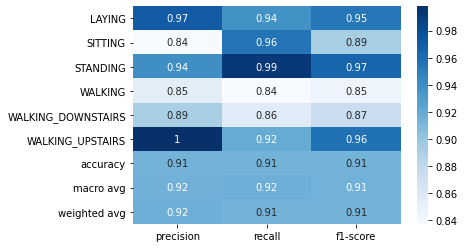

In [10]:
# Heatmap for the LSTM model
prediction, target_names = create_heatmap(BestLSTMModel, testX, testy, y_labels)

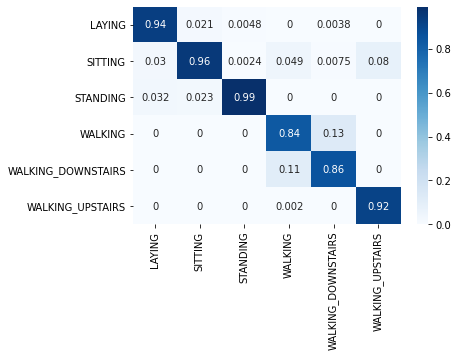

In [11]:
Con_Matrix(testy, prediction, target_names)

CNNLSTM

In [12]:
# load the saved CNNLSTM model
BestCNNLSTMModel = keras.models.load_model(f'/content/content/CrispCerebella/Models/Final_Model_CNNLSTM_{acc_CNNLSTM}')

In [13]:
n_features =testX.shape[2]
n_steps, n_length = 4, 32
testX = testX.reshape((testX.shape[0], n_steps, n_length, n_features))

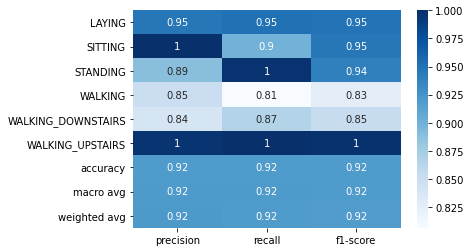

In [14]:
# Heatmap for the CNNLSTM model
prediction, target_names = create_heatmap(BestCNNLSTMModel, testX, testy, y_labels)

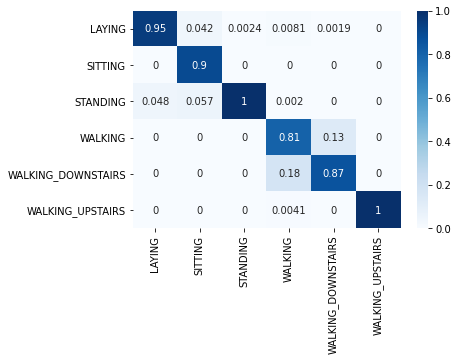

In [15]:
Con_Matrix(testy, prediction, target_names)

ConvLSTM

In [16]:
# load the saved ConvLSTM model
BestConvLSTMModel = keras.models.load_model(f'/content/content/CrispCerebella/Models/Final_Model_ConvLSTM_{acc_ConvLSTM}')

In [17]:
testX = testX.reshape((testX.shape[0], n_steps, 1, n_length, n_features))

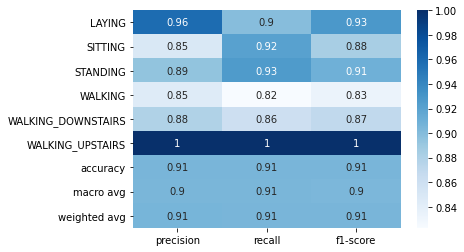

In [18]:
# Heatmap for the ConvLSTM model
prediction, target_names = create_heatmap(BestConvLSTMModel, testX, testy, y_labels)

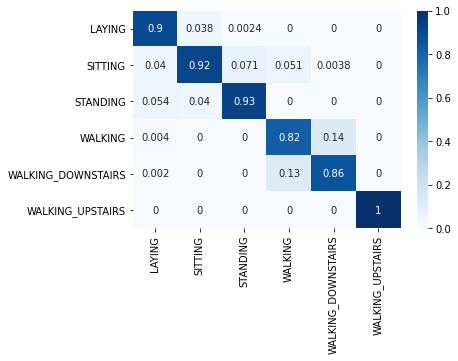

In [19]:
Con_Matrix(testy, prediction, target_names)

Transform Learning

In [20]:
testX, testy = datasetloader('test', '/content/CrispCerebella/Dataset/UCI HAR Dataset/')
print("Shape of test Data:", testX.shape, testy.shape)

Shape of test Data: (2947, 128, 9) (2947, 1)


In [21]:
testX = testX[:,:,[0,1,2,6,7,8]]
n_features =testX.shape[2]
testX = testX.reshape((testX.shape[0], n_steps, 1, n_length, n_features))

In [22]:
# load the saved Transfer model
BestTransferModel = keras.models.load_model(f'/content/content/CrispCerebella/Models/Final_Model_Transfermodel_{acc_Transfer}')

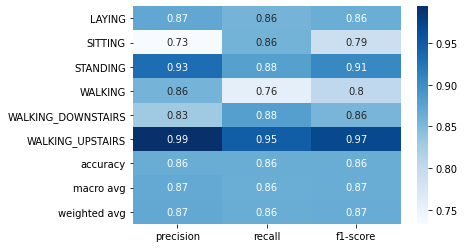

In [24]:
# Heatmap for the Transfer model
prediction, target_names = create_heatmap(BestTransferModel, testX, testy, y_labels)

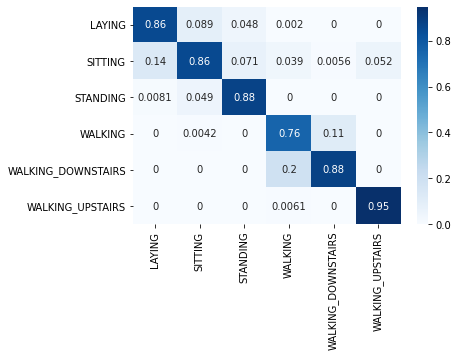

In [25]:
Con_Matrix(testy, prediction, target_names)